# Data preprocessing with Stan    
Welcome! Let me show you around on this amazing journey.    


#### The path    
First, make sure that you have created a .py file containing variable AUDIO_DATA_PATH with the path to the audio data, pointing to AUDIO.

In [1]:
import paths
# Create a .py file containing variable AUDIO_DATA_PATH with the path to the audio data, pointing to AUDIO
AUDIO_DATA_PATH = paths.AUDIO_DATA_PATH # Specjalnie dla twojego maca Kamil <3
# The structure of the data folder should be as follows:

#         ↓   The path should be pointing to this folder
# data/AUDIO/
#           FAKE
#           REAL

### Imports

In [2]:
# Imports go brrrrrr
import os
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import keras
import wave
import matplotlib.pyplot as plt

from keras import layers
from keras import models
from IPython import display
from pydub import AudioSegment

c:\Users\wasil\anaconda3\envs\ml01\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


### Splitting audio    


In [4]:
# Splitting the data into 10 second fragments and saving them to the AUDIO folder

def split_audio(input_folder, output_folder, duration=10):

    for root, _, files in os.walk(input_folder):
        for file in files:
            if file.endswith(".mp3") or file.endswith(".wav"):
                input_path = os.path.join(root, file)
                audio = AudioSegment.from_file(input_path)

                for i, chunk in enumerate(audio[::duration * 1000]): # duration 10 seconds
                    chunk_name = f"{os.path.splitext(file)[0]}_{i}.wav"
                    output_path = os.path.join(output_folder, chunk_name)
                    chunk.export(output_path, format="wav")

input_folder = AUDIO_DATA_PATH
output_folder_real = os.path.join(AUDIO_DATA_PATH, "NEW_REAL")
output_folder_fake = os.path.join(AUDIO_DATA_PATH, "NEW_FAKE")

split_audio(os.path.join(input_folder, "REAL"), output_folder_real)
split_audio(os.path.join(input_folder, "FAKE"), output_folder_fake)


### Saving images  
Now it's time to steal Andrea's code, which she probably stole from kaggle and which I do not understand.    
I take each audio channel as a separate image for more data, and save them into new folders.

TypeError: Dimensions of C (441000, 2, 1) should be one smaller than X(1) and Y(2) while using shading='flat' see help(pcolormesh)

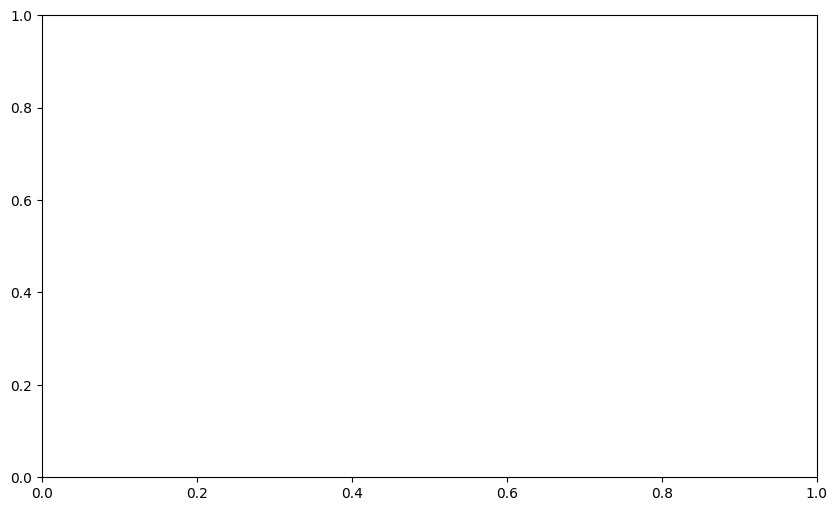

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy import signal

# Define paths
data_folder = AUDIO_DATA_PATH
fake_audio_folder = os.path.join(data_folder, "NEW_FAKE")
real_audio_folder = os.path.join(data_folder, "NEW_REAL")
fake_images_folder = os.path.join(data_folder, "FAKE_IMAGES")
real_images_folder = os.path.join(data_folder, "REAL_IMAGES")

# Create output folders if they don't exist
os.makedirs(fake_images_folder, exist_ok=True)
os.makedirs(real_images_folder, exist_ok=True)

def create_spectrogram(audio_folder, images_folder):
    for filename in os.listdir(audio_folder):
        if filename.endswith(".wav"):
            filepath = os.path.join(audio_folder, filename)
            sample_rate, samples = wavfile.read(filepath)
            frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate)

            # Add a small constant to avoid division by zero
            eps = 1e-10
            log_spectrogram = 10 * np.log10(spectrogram + eps)

            # Plot and save the spectrogram
            plt.figure(figsize=(10, 6))
            plt.pcolormesh(times, frequencies, log_spectrogram, shading='auto')
            plt.ylabel("Frequency [Hz]")
            plt.xlabel("Time [sec]")
            plt.title(f"Spectrogram for {filename}")
            plt.colorbar(label="Intensity (dB)")
            plt.savefig(os.path.join(images_folder, f"{os.path.splitext(filename)[0]}.png"))
            plt.close()

            print(f"Spectrogram saved for {filename}")


# Create spectrograms for fake and real audio
create_spectrogram(fake_audio_folder, fake_images_folder)
create_spectrogram(real_audio_folder, real_images_folder)


In [ ]:
def save_images(input_folder, output_folder):
    for root, _, files in os.walk(input_folder):
        for file in files:
            if file.endswith(".mp3") or file.endswith(".wav"):
                input_path = os.path.join(root, file)
                audio = wave.open(input_path)

                img_name = f"{os.path.splitext(file)[0]}"
                output_path = os.path.join(output_folder, img_name)

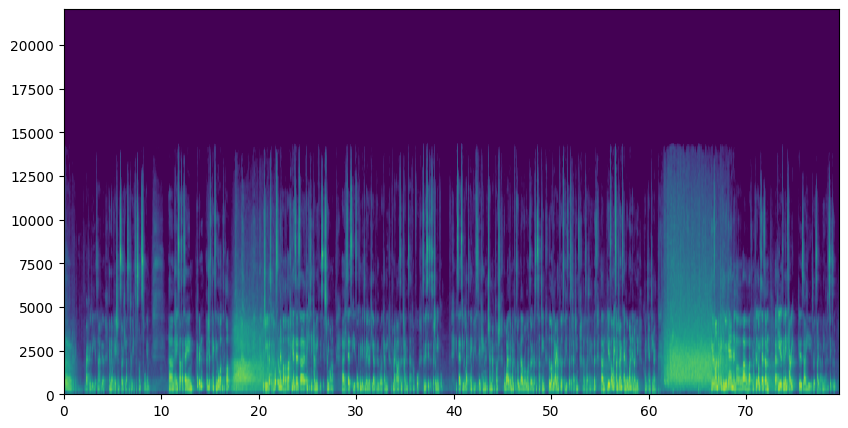

In [14]:
audio = wave.open('data/AUDIO/REAL/margot-original.wav', 'rb')

sample_freq = audio.getframerate()
n_samples = audio.getnframes()
t_audio = n_samples/sample_freq

signal_wave = audio.readframes(n_samples)
signal_array = np.frombuffer(signal_wave, dtype=np.int16)

l_channel = signal_array[0::2]
r_channel = signal_array[1::2]

plt.figure(figsize=(10, 5))
plt.specgram(l_channel, Fs=sample_freq, vmin=-20, vmax=50)
#plt.title('This is it.')
#plt.ylabel('Frequency (Hz)')
#plt.xlabel('Time (s)')
plt.xlim(0, t_audio)
#plt.colorbar()
plt.show()